In [62]:
import tensorflow
from tensorflow import keras
import matplotlib.pyplot as plt
%matplotlib inline

In [63]:
(x_train, y_train), (x_test,y_test) = keras.datasets.fashion_mnist.load_data()

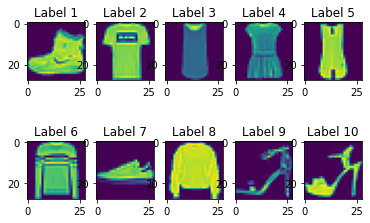

In [64]:
for i in range(10):
    plt.subplot(2,5,i+1)
    plt.title("Label "+str(i+1))
    plt.imshow(x_train[i].reshape(28,28))

In [65]:
x_train[0].shape

(28, 28)

In [66]:
x_train = x_train/ 255.0
x_test = x_test/255.0
# normalization -> make all the datas be btw 0 and 1

In [67]:
model = keras.models.Sequential([
    keras.layers.Flatten(),
    keras.layers.Dense(512, activation = 'relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation = 'softmax')
])
#Flatten -> make (28,28) matrix into 28*28 one dimensinal array 
# relu activation function   f(x) = x if x>0 || f(x) = 0 if x<=0 
# Dropout -> prevent overfitting. outcome without dropout is below. 
#softmax ->  each value is btw 0 and 1. and the sum of all the values is 1. 

In [68]:
model.compile(
    optimizer = 'adam',
    loss = 'sparse_categorical_crossentropy',
    metrics = ["accuracy"]
)

In [69]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.4953 - accuracy: 0.8221
Epoch 2/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3855 - accuracy: 0.8580
Epoch 3/5
1875/1875 [==============================] - 7s 4ms/step - loss: 0.3519 - accuracy: 0.8704
Epoch 4/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3289 - accuracy: 0.8792
Epoch 5/5
1875/1875 [==============================] - 6s 3ms/step - loss: 0.3124 - accuracy: 0.8839


In [70]:
model.evaluate(x_test,y_test)

313/313 [==============================] - 1s 2ms/step - loss: 0.4066 - accuracy: 0.8550


[0.4065752327442169, 0.8550000190734863]

In [71]:
preds = model.predict(x_test)

In [72]:
y_test[0:10]

array([9, 2, 1, 1, 6, 1, 4, 6, 5, 7], dtype=uint8)

In [73]:
for i in range(10):
    max=0
    for j in range(10):
        if(preds[i][j]>preds[i][max]):
            max=j
    print(max==y_test[i])

True
True
True
True
True
True
True
True
True
True
